
**TASK**
1. **Import  load_breast_cancer from sklearn and perform the following tasks**
2.   **Perform feature selection.**
3.   **Build logistic regression model using variables that were narrowed down in step (2).**
4. **Measure the accuracy of the model.**
5. **Draw a table for all the metrics.**
6. **Draw ROC curve.**
7.	**Compare with any other two classifier and write your observations**

**Step 1: Import the Dataset**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load dataset
data = load_breast_cancer()
X = data['data']
y = data['target']


**Step 2: Perform Feature Selection**

In [ ]:
# Select the top 10 features
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = np.array(data['feature_names'])[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


**Step 3: Split the Dataset**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


**Step 4: Build and Train the Logistic Regression Model**

In [ ]:
# Build and train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

**Step 5: Measure the Accuracy**

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Measure the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9912280701754386


**Step 6: Draw a Table for All Metrics**

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=data['target_names'])

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[42  1]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Step 7: Draw the ROC Curve**

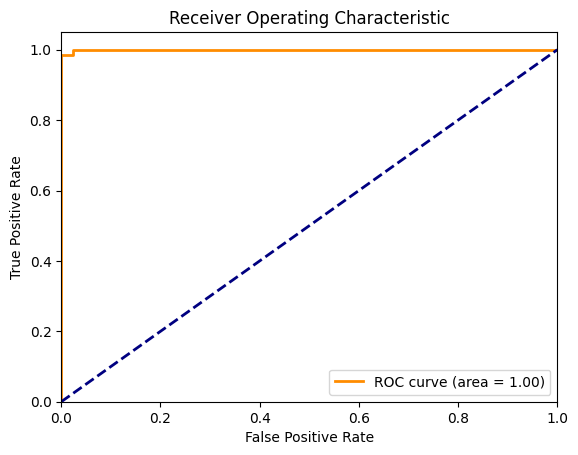

In [ ]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Step 8: Compare with Two Other Classifiers**

In [ ]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_accuracy)

# SVM Classifier
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Compare results
print("\nLogistic Regression Accuracy:", accuracy)
print("Decision Tree Accuracy:", tree_accuracy)
print("SVM Accuracy:", svm_accuracy)


Decision Tree Accuracy: 0.9298245614035088
SVM Accuracy: 0.9473684210526315

Logistic Regression Accuracy: 0.9912280701754386
Decision Tree Accuracy: 0.9298245614035088
SVM Accuracy: 0.9473684210526315
